<a href="https://colab.research.google.com/github/jakekwon1/git-server/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

combine = [train_df, test_df]

In [ ]:
train_df

In [5]:
train_df['Sex'].value_counts()
sibsp_df= train_df.dropna(axis=0)
fare_df = train_df.copy()
fare_df['Fare']= pd.qcut(fare_df['Fare'],q=4)
fare_df= fare_df.replace('(31.0, 512.329]','31.0<')
fare_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,"(-0.001, 7.91]",NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,"(31.0, 512.329]",C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,"(7.91, 14.454]",NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,"(31.0, 512.329]",C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,"(7.91, 14.454]",NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,"(7.91, 14.454]",NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,"(14.454, 31.0]",B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,"(14.454, 31.0]",NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,"(14.454, 31.0]",C148,C


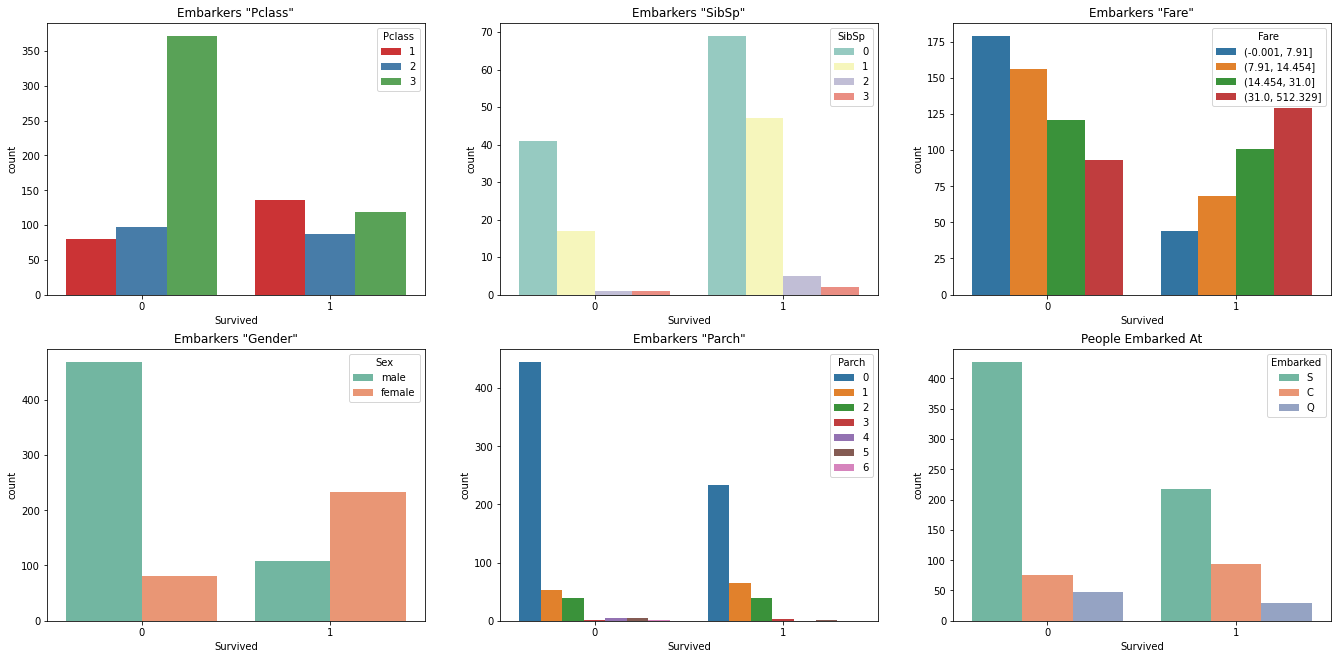

In [6]:
fig = plt.figure(figsize=(23, 11))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.countplot(x='Survived', hue='Pclass', palette='Set1', data=train_df, ax=ax1)
sns.countplot(x='Survived', hue='SibSp', palette='Set3', data=sibsp_df, ax=ax2)
sns.countplot(x='Survived', hue='Fare', data=fare_df, ax=ax3)
sns.countplot(x='Survived', hue='Sex', palette='Set2', data=train_df, ax=ax4) 
sns.countplot(x='Survived', hue='Parch', data=train_df, ax=ax5) 
sns.countplot(x='Survived', hue='Embarked', palette='Set2', data=train_df, ax=ax6) 


ax1.set_title('Embarkers "Pclass"')
ax2.set_title('Embarkers "SibSp"')
ax3.set_title('Embarkers "Fare"')
ax4.set_title('Embarkers "Gender"')
ax5.set_title('Embarkers "Parch"')
ax6.set_title("People Embarked At")

plt.show()

In [7]:
train_data =train_df.drop(['Name','PassengerId','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
test_data = test_df.drop(['Name','PassengerId','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)

In [8]:
train_data=train_data.dropna(axis=0)
train_data=train_data.reset_index().drop('index',axis=1)
train_data

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
709,0,3,female,39.0,29.1250
710,0,2,male,27.0,13.0000
711,1,1,female,19.0,30.0000
712,1,1,male,26.0,30.0000


In [9]:
train_input = train_data.drop('Survived',axis=1)
train_target = train_data['Survived']

train_input.shape, train_target.shape

((714, 4), (714,))

In [10]:
train_input['Sex'] = train_input['Sex'].replace({'male':0,'female':1})
train_input['Fare']= pd.qcut(train_input['Fare'],q=4,labels=False)

In [11]:
#test_data.dropna(axis=0, inplace=True)

test_data['Sex'] = test_data['Sex'].replace({'male':0,'female':1})
test_data['Fare']= pd.qcut(test_data['Fare'],q=4,labels=False)
age= test_data['Age'].mean()
test_data= test_data.replace(np.nan,age)
test_data.head(20)

,Pclass,Sex,Age,Fare
0,3,0,34.50000,0.0
1,3,1,47.00000,0.0
2,2,0,62.00000,1.0
3,3,0,27.00000,1.0
4,3,1,22.00000,1.0
5,3,0,14.00000,1.0
6,3,1,30.00000,0.0
7,2,0,26.00000,2.0
8,3,1,18.00000,0.0
9,3,0,21.00000,2.0


In [12]:
test_data

,Pclass,Sex,Age,Fare
0,3,0,34.50000,0.0
1,3,1,47.00000,0.0
2,2,0,62.00000,1.0
3,3,0,27.00000,1.0
4,3,1,22.00000,1.0
...,...,...,...,...
413,3,0,30.27259,1.0
414,1,1,39.00000,3.0
415,3,0,38.50000,0.0
416,3,0,30.27259,1.0


In [13]:
test_data

,Pclass,Sex,Age,Fare
0,3,0,34.50000,0.0
1,3,1,47.00000,0.0
2,2,0,62.00000,1.0
3,3,0,27.00000,1.0
4,3,1,22.00000,1.0
...,...,...,...,...
413,3,0,30.27259,1.0
414,1,1,39.00000,3.0
415,3,0,38.50000,0.0
416,3,0,30.27259,1.0


In [64]:
from sklearn.model_selection import train_test_split#, StratifiedKFold
X_train,Y_train,X_test,Y_test = train_test_split(train_input,train_target, shuffle=True)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, X_test)
#pred = knn.predict(test_data)
knn.score(Y_train, Y_test)

#k-이웃 점수가 높으면 다른 모듈의 점수가 낮아진다

0.7430167597765364

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train, X_test)
dt.score(Y_train, Y_test)

0.8324022346368715

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=50)
rf.fit(X_train, X_test)
rf.score(Y_train, Y_test)

0.8547486033519553

In [86]:
pred = vt.predict(test_data)

In [67]:
from sklearn.naive_bayes import GaussianNB
gs= GaussianNB()
gs.fit(X_train, X_test)
gs.score(Y_train, Y_test)

0.7932960893854749

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()
ada.fit(X_train, X_test)
ada.score(Y_train, Y_test)

0.8324022346368715

In [54]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qd= QuadraticDiscriminantAnalysis()
qd.fit(X_train, X_test)
qd.score(Y_train, Y_test)

0.7597765363128491

In [55]:
from sklearn.svm import SVC
svcl= SVC(kernel='linear')
svcl.fit(X_train, X_test)
svcl.score(Y_train, Y_test)

0.776536312849162

In [23]:
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(X_train, X_test)
svc_rbf.score(Y_train, Y_test)

0.6201117318435754

In [24]:
svcs= SVC(kernel='sigmoid')
svcs.fit(X_train, X_test)
svcs.score(Y_train, Y_test)

0.44692737430167595

In [25]:
svcp= SVC(kernel='poly')
svcp.fit(X_train, X_test)
svcp.score(Y_train, Y_test)

0.6759776536312849

In [85]:
from sklearn.ensemble import VotingClassifier
vt= VotingClassifier(estimators=[('dt',dt),('rf',rf),('ada',ada)])
vt.fit(X_train, X_test)
vt.score(Y_train, Y_test)

0.8491620111731844

In [27]:
from sklearn.ensemble import BaggingClassifier
bg= BaggingClassifier(estimator=ada, n_estimators=5)
bg.fit(X_train, X_test)
bg.score(Y_train, Y_test)

0.8044692737430168

<BarContainer object of 10 artists>

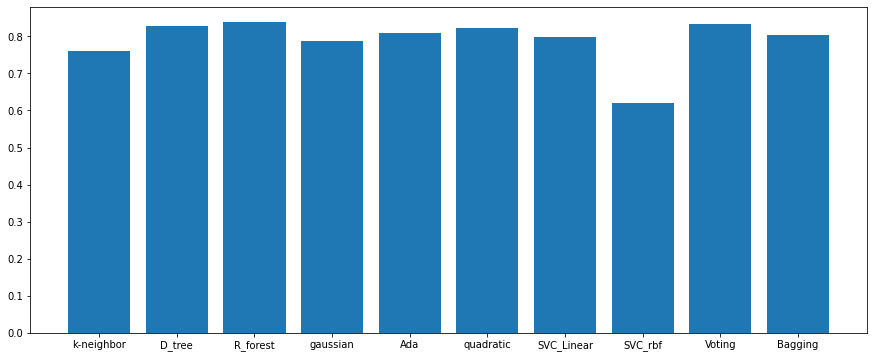

In [28]:
from sklearn.metrics import accuracy_score
modelnames=['k-neighbor','D_tree','R_forest','gaussian','Ada','quadratic','SVC_Linear','SVC_rbf','Voting','Bagging']
accuracy=[knn.score(Y_train, Y_test), dt.score(Y_train, Y_test), rf.score(Y_train, Y_test), gs.score(Y_train, Y_test), ada.score(Y_train, Y_test), qd.score(Y_train, Y_test), 
          svcl.score(Y_train, Y_test), svc_rbf.score(Y_train, Y_test), vt.score(Y_train, Y_test), bg.score(Y_train, Y_test)]

fig= plt.figure(figsize=(15,6))
plt.bar(modelnames,accuracy)

In [82]:
test= test_df.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
test.replace(np.nan, age)
test

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,male,34.5,7.8292
1,893,3,female,47.0,7.0000
2,894,2,male,62.0,9.6875
3,895,3,male,27.0,8.6625
4,896,3,female,22.0,12.2875
...,...,...,...,...,...
413,1305,3,male,NaN,8.0500
414,1306,1,female,39.0,108.9000
415,1307,3,male,38.5,7.2500
416,1308,3,male,NaN,8.0500


In [93]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred
    })
submission.to_csv('submission1.csv', index=False)

In [89]:
pred.shape

(418,)